<a href="https://colab.research.google.com/github/ferreirabruno7/machine_learning/blob/master/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
#acess drive file
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [38]:
#import libraries 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer
import re
import statsmodels.formula.api as smf
import pandas as pd
from geopy.geocoders import Nominatim
import folium
 

In [39]:
#import dataset
booking = pd.read_csv("/content/drive/My Drive/data_sets/booking.csv", delimiter = ';',  encoding='utf-8')
booking.head()

,url,nome,descricao,estrelas,preco],Type,Address,revies,nota,notas_facilidades,notas_limpezas,notas_conforto,notas_valor,notas_localização,notas_wifi,notas_serviço
0,https://www.booking.com/hotel/br/cozzy-suites....,Cozzy Suites Paraíso Hotel,\nVocê se qualifica para um desconto Genius em...,4.0,75.0,Hotel\n\n\n\n\n\n\n\n\n\n\n\n\n\nViagem Susten...,"993 Rua Cubatão, Vila Mariana, São Paulo, CEP ...",515.0,92.0,93.0,94.0,93.0,88.0,91.0,94.0,96.0
1,https://www.booking.com/hotel/br/goodstay.pt-b...,GoodStay São Paulo Ibirapuera,\nVocê se qualifica para um desconto Genius em...,4.0,45.0,Hotel\n\n\n\n\nNovidade na Booking.com\n\n\n\n...,"Avenida Brigadeiro Luís Antônio, 4228 GoodStay...",73.0,84.0,82.0,85.0,83.0,87.0,92.0,80.0,93.0
2,https://www.booking.com/hotel/br/transamerica-...,Transamerica Prime International Plaza (Paulista),\n O Transamérica Prime International Plaza es...,4.0,82.0,Hotel\n\n\n\n\n\n\n\n\n\n\n\n\n\nViagem Susten...,"Alameda Santos, 981, Jardim Paulista, São Paul...",3701.0,84.0,82.0,86.0,85.0,81.0,96.0,72.0,88.0
3,https://www.booking.com/hotel/br/oy-ap1502.pt-...,Oy Frei Caneca ap1502,"\n Localizado no bairro Bela Vista, em São Pau...",3.0,40.0,Novidade na Booking.com\n\n\n\n\n\n\n\n\n\n\n\...,"677 Rua Frei Caneca Ap1502, Consolação, São Pa...",2.0,90.0,88.0,100.0,88.0,88.0,100.0,0.0,88.0
4,https://www.booking.com/hotel/br/pestana-sao-p...,Pestana São Paulo,\nVocê se qualifica para um desconto Genius em...,4.0,96.0,Viagem Sustentável - Nível 2\n\n\n\n\n\n\n\n\n...,"Rua Tutóia, 77, São Paulo, CEP 04007-000, Brasil",1555.0,79.0,76.0,79.0,80.0,74.0,87.0,78.0,85.0


#Pré-Processamento dos dados

In [41]:
#info
booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901 entries, 0 to 900
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   url                900 non-null    object 
 1   nome               876 non-null    object 
 2   descricao          900 non-null    object 
 3   estrelas           900 non-null    float64
 4   preco]             878 non-null    float64
 5   Type               654 non-null    object 
 6   Address            900 non-null    object 
 7   revies             793 non-null    float64
 8   nota               793 non-null    float64
 9   notas_facilidades  900 non-null    float64
 10  notas_limpezas     900 non-null    float64
 11  notas_conforto     900 non-null    float64
 12  notas_valor        900 non-null    float64
 13  notas_localização  900 non-null    float64
 14  notas_wifi         900 non-null    float64
 15  notas_serviço      793 non-null    float64
dtypes: float64(11), object(5)


In [42]:
#verificar valores nulos
booking.isnull().sum()

url                    1
nome                  25
descricao              1
estrelas               1
preco]                23
Type                 247
Address                1
revies               108
nota                 108
notas_facilidades      1
notas_limpezas         1
notas_conforto         1
notas_valor            1
notas_localização      1
notas_wifi             1
notas_serviço        108
dtype: int64

<Axes: >

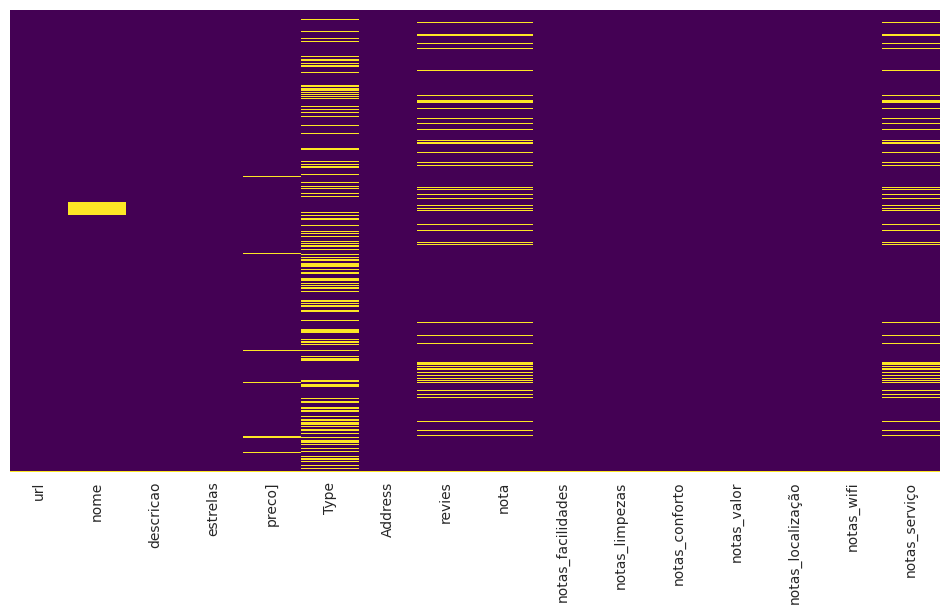

In [43]:
##visualização dos dados Faltantes
plt.figure(figsize=(12,6))
sns.heatmap(booking.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [44]:
#describe de valores

booking.describe()

,estrelas,preco],revies,nota,notas_facilidades,notas_limpezas,notas_conforto,notas_valor,notas_localização,notas_wifi,notas_serviço
count,900.000000,878.000000,793.000000,793.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,793.000000
mean,2.707778,62.740319,486.372005,81.099622,72.716667,73.651111,73.171111,71.265556,78.608889,42.151111,85.827238
std,1.461461,61.946834,1006.931547,13.835758,29.059847,29.329710,29.308221,28.521630,30.253845,41.294992,11.355778
min,0.000000,9.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000
25%,3.000000,35.000000,6.000000,76.000000,73.000000,75.000000,75.000000,73.000000,81.000000,0.000000,82.000000
50%,3.000000,47.000000,31.000000,83.000000,82.000000,83.000000,83.000000,80.000000,90.000000,59.000000,88.000000
75%,4.000000,69.750000,452.000000,89.000000,89.000000,90.000000,89.000000,87.000000,95.000000,81.000000,92.000000
max,5.000000,680.000000,7788.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [45]:
# Função para extrair apenas os números do CEP
def extrair_cep(texto):
    if isinstance(texto, str):
        padrao_cep = r'CEP (\d{5}-\d{3})'
        match = re.search(padrao_cep, texto)
        if match:
            cep_completo = match.group(1)
            cep_numeros = re.sub(r'\D', '', cep_completo)  # Remover não dígitos
            return cep_numeros
    return None


In [46]:
# Aplicar a função ao DataFrame e criar a nova coluna 'CEP'
booking['CEP'] = booking['Address'].apply(extrair_cep)

In [10]:
#exibir data frame
booking

,url,nome,descricao,estrelas,preco],Type,Address,revies,nota,notas_facilidades,notas_limpezas,notas_conforto,notas_valor,notas_localização,notas_wifi,notas_serviço,CEP
0,https://www.booking.com/hotel/br/cozzy-suites....,Cozzy Suites Paraíso Hotel,\nVocê se qualifica para um desconto Genius em...,4.0,75.0,Hotel\n\n\n\n\n\n\n\n\n\n\n\n\n\nViagem Susten...,"993 Rua Cubatão, Vila Mariana, São Paulo, CEP ...",515.0,92.0,93.0,94.0,93.0,88.0,91.0,94.0,96.0,04013043
1,https://www.booking.com/hotel/br/goodstay.pt-b...,GoodStay São Paulo Ibirapuera,\nVocê se qualifica para um desconto Genius em...,4.0,45.0,Hotel\n\n\n\n\nNovidade na Booking.com\n\n\n\n...,"Avenida Brigadeiro Luís Antônio, 4228 GoodStay...",73.0,84.0,82.0,85.0,83.0,87.0,92.0,80.0,93.0,01402002
2,https://www.booking.com/hotel/br/transamerica-...,Transamerica Prime International Plaza (Paulista),\n O Transamérica Prime International Plaza es...,4.0,82.0,Hotel\n\n\n\n\n\n\n\n\n\n\n\n\n\nViagem Susten...,"Alameda Santos, 981, Jardim Paulista, São Paul...",3701.0,84.0,82.0,86.0,85.0,81.0,96.0,72.0,88.0,01419001
3,https://www.booking.com/hotel/br/oy-ap1502.pt-...,Oy Frei Caneca ap1502,"\n Localizado no bairro Bela Vista, em São Pau...",3.0,40.0,Novidade na Booking.com\n\n\n\n\n\n\n\n\n\n\n\...,"677 Rua Frei Caneca Ap1502, Consolação, São Pa...",2.0,90.0,88.0,100.0,88.0,88.0,100.0,0.0,88.0,01307001
4,https://www.booking.com/hotel/br/pestana-sao-p...,Pestana São Paulo,\nVocê se qualifica para um desconto Genius em...,4.0,96.0,Viagem Sustentável - Nível 2\n\n\n\n\n\n\n\n\n...,"Rua Tutóia, 77, São Paulo, CEP 04007-000, Brasil",1555.0,79.0,76.0,79.0,80.0,74.0,87.0,78.0,85.0,04007000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,https://www.booking.com/hotel/br/aconchego-do-...,Casa Sobrado,"\n Situada em São Paulo, a 3,9 km do Pavilhão ...",0.0,51.0,Casa de temporada\n\n\n\n\n\n\n\n\n\n\n\nCasa ...,"São Paulo -Vila Clementino, São Paulo, CEP 040...",8.0,79.0,75.0,78.0,78.0,78.0,88.0,0.0,81.0,04041001
897,https://www.booking.com/hotel/br/flat-mobiliad...,Flat Lindo ao lado Park Ibirapuera e Av Paulis...,\nVocê se qualifica para um desconto Genius em...,3.0,37.0,Apart-hotel\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nApart...,"70 Rua Salto apto 103, São Paulo, CEP 04001-13...",34.0,75.0,74.0,78.0,80.0,79.0,94.0,80.0,84.0,04001130
898,https://www.booking.com/hotel/br/casa-em-condo...,Casa em condomínio com piscina privativa,"\n Localizada em São Paulo, a 1,7 km da Praia ...",0.0,217.0,Casa de temporada\n\n\n\n\n\n\n\n\n\n\n\nCasa ...,"121 Rua Praia da Lagoinha, São Paulo, CEP 1160...",3.0,100.0,100.0,100.0,92.0,92.0,75.0,0.0,100.0,11600000
899,https://www.booking.com/hotel/br/la-jolla-suit...,LA Jolla Suítes Alto da Lapa,"\n Oferecendo vista do jardim, o LA Jolla Suít...",0.0,NaN,Hospedagem domiciliar\n\n\n\n\n\n\n\n\nTransfe...,"Rua Princesa Leopoldina 249, São Paulo, CEP 05...",3.0,60.0,67.0,75.0,67.0,75.0,75.0,0.0,75.0,05081090


In [92]:
#converter cep em latitude e longitude
from geopy.geocoders import Nominatim

# Criar uma instância do geolocator
geolocator = Nominatim(user_agent="my-app")

# Função para converter o CEP em latitude e longitude
def converter_cep_para_coordenadas(cep):
    location = geolocator.geocode(cep)
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

In [93]:
# Criar listas vazias para latitude e longitude
latitude = []
longitude = []

In [94]:
# Iterar sobre os CEPs e converter em coordenadas
for cep in booking['CEP']:
    lat, lon = converter_cep_para_coordenadas(cep)
    latitude.append(lat)
    longitude.append(lon)

# Atribuir as listas como novas colunas no DataFrame
booking['Latitude'] = latitude
booking['Longitude'] = longitude

In [95]:
booking

,url,nome,descricao,estrelas,preco],Type,Address,revies,nota,notas_facilidades,...,notas_valor,notas_localização,notas_wifi,notas_serviço,CEP,tipo,tipo2,tipo3,Latitude,Longitude
0,https://www.booking.com/hotel/br/cozzy-suites....,Cozzy Suites Paraíso Hotel,\nVocê se qualifica para um desconto Genius em...,4.000000,75.000000,Hotel\n\n\n\n\n\n\n\n\n\n\n\n\n\nViagem Susten...,"993 Rua Cubatão, Vila Mariana, São Paulo, CEP ...",515.000000,92.000000,93.000000,...,88.000000,91.000000,94.000000,96.000000,04013043,Hotel Hotel Viagem,Hotel,Hotel,-23.579140,-46.642129
1,https://www.booking.com/hotel/br/goodstay.pt-b...,GoodStay São Paulo Ibirapuera,\nVocê se qualifica para um desconto Genius em...,4.000000,45.000000,Hotel\n\n\n\n\nNovidade na Booking.com\n\n\n\n...,"Avenida Brigadeiro Luís Antônio, 4228 GoodStay...",73.000000,84.000000,82.000000,...,87.000000,92.000000,80.000000,93.000000,01402002,Hotel Hotel Novidade na,Hotel,Hotel,-23.581783,-46.666162
2,https://www.booking.com/hotel/br/transamerica-...,Transamerica Prime International Plaza (Paulista),\n O Transamérica Prime International Plaza es...,4.000000,82.000000,Hotel\n\n\n\n\n\n\n\n\n\n\n\n\n\nViagem Susten...,"Alameda Santos, 981, Jardim Paulista, São Paul...",3701.000000,84.000000,82.000000,...,81.000000,96.000000,72.000000,88.000000,01419001,Hotel Hotel Viagem,Hotel,Hotel,-23.566594,-46.652647
3,https://www.booking.com/hotel/br/oy-ap1502.pt-...,Oy Frei Caneca ap1502,"\n Localizado no bairro Bela Vista, em São Pau...",3.000000,40.000000,Novidade na Booking.com\n\n\n\n\n\n\n\n\n\n\n\...,"677 Rua Frei Caneca Ap1502, Consolação, São Pa...",2.000000,90.000000,88.000000,...,88.000000,100.000000,0.000000,88.000000,01307001,Novidade Novidade na,Novidade,Novidade,-23.554101,-46.653609
4,https://www.booking.com/hotel/br/pestana-sao-p...,Pestana São Paulo,\nVocê se qualifica para um desconto Genius em...,4.000000,96.000000,Viagem Sustentável - Nível 2\n\n\n\n\n\n\n\n\n...,"Rua Tutóia, 77, São Paulo, CEP 04007-000, Brasil",1555.000000,79.000000,76.000000,...,74.000000,87.000000,78.000000,85.000000,04007000,Viagem Viagem,Viagem Viagem,Viagem Viagem,-23.572880,-46.652903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,https://www.booking.com/hotel/br/aconchego-do-...,Casa Sobrado,"\n Situada em São Paulo, a 3,9 km do Pavilhão ...",0.000000,51.000000,Casa de temporada\n\n\n\n\n\n\n\n\n\n\n\nCasa ...,"São Paulo -Vila Clementino, São Paulo, CEP 040...",8.000000,79.000000,75.000000,...,78.000000,88.000000,0.000000,81.000000,04041001,Casa Casa de temporada Casa de temporada Casa ...,Casa Casa de temporada Casa de temporada Casa ...,Casa de temporada,NaN,NaN
897,https://www.booking.com/hotel/br/flat-mobiliad...,Flat Lindo ao lado Park Ibirapuera e Av Paulis...,\nVocê se qualifica para um desconto Genius em...,3.000000,37.000000,Apart-hotel\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nApart...,"70 Rua Salto apto 103, São Paulo, CEP 04001-13...",34.000000,75.000000,74.000000,...,79.000000,94.000000,80.000000,84.000000,04001130,Apart,Apart,Apart,NaN,NaN
898,https://www.booking.com/hotel/br/casa-em-condo...,Casa em condomínio com piscina privativa,"\n Localizada em São Paulo, a 1,7 km da Praia ...",0.000000,217.000000,Casa de temporada\n\n\n\n\n\n\n\n\n\n\n\nCasa ...,"121 Rua Praia da Lagoinha, São Paulo, CEP 1160...",3.000000,100.000000,100.000000,...,92.000000,75.000000,0.000000,100.000000,11600000,Casa Casa de temporada Casa de temporada Casa ...,Casa Casa de temporada Casa de temporada Casa ...,Casa de temporada,-23.771027,-45.563905
899,https://www.booking.com/hotel/br/la-jolla-suit...,LA Jolla Suítes Alto da Lapa,"\n Oferecendo vista do jardim, o LA Jolla Suít...",0.000000,62.740319,Hospedagem domiciliar\n\n\n\n\n\n\n\n\nTransfe...,"Rua Princesa Leopoldina 249, São Paulo, CEP 05...",3.000000,60.000000,67.000000,...,75.000000,75.000000,0.000000,75.000000,05081090,Hospedagem Hospedagem domiciliar Transfer (aer...,Hospedagem Hospedagem domiciliar Transfer (aer...,Tr

In [96]:

#limpar campo Type
booking['Type'] = booking['Type'].str.replace('\n', '')



In [97]:
#tratar campo Type
import math

def tratar_tipo_acomodacao(tipo):
    # Verificar se o valor é NaN
    if isinstance(tipo, float) and math.isnan(tipo):
        return tipo
    
    # Verificar se os dados estão separados por "-"
    if "-" in tipo:
        tipo = tipo.split("-")[0].strip()
    
    # Verificar se os dados estão separados por "."
    if "." in tipo:
        tipo = tipo.split(".")[0].strip()
    
    # Verificar se há termos repetidos e manter apenas o primeiro termo
    termos = tipo.split()
    tipo = " ".join([termos[0]] + [termo for termo, proximo in zip(termos, termos[1:]) if termo != proximo])
    
    return tipo



In [98]:
booking['tipo'] = booking['Type'].apply(tratar_tipo_acomodacao)


In [99]:
result = booking['tipo'].value_counts().head(10)
print(result)

ApartamentoApartamentoApartamentoApartamento        113
Novidade Novidade na                                 95
Viagem Viagem                                        79
ApartamentoNovidade ApartamentoNovidade na           46
Viagem Viagem SustentávelViagem                      44
ApartamentosApartamentosApartamentosApartamentos     40
HotelHotelHotelHotel                                 34
HotelViagem HotelViagem                              27
ApartamentoViagem ApartamentoViagem                  23
ApartamentosNovidade ApartamentosNovidade na         17
Name: tipo, dtype: int64


In [100]:
#criar nova função 

import math

def tratar_tipo_acomodacao(tipo):
    # Verificar se o valor é NaN
    if isinstance(tipo, float) and math.isnan(tipo):
        return tipo
    
    # Tratamento específico de categorias
    if "Hotel" in tipo:
        tipo = "Hotel"
    elif "Viagem Sustentável" in tipo:
        tipo = "Viagem Sustentável"
    elif "Novidade" in tipo:
        tipo = "Novidade"
    elif "Apartamentos" in tipo:
        tipo = "Apartamentos"
    elif "Apartamento" in tipo and "Viagem" in tipo:
        tipo = "Apartamento Viagem"
    elif "Apart" in tipo:
        tipo = "Apart"
    elif "Casa" in tipo and "de temporada" in tipo:
        tipo = "Casa de temporada"
    elif "Transfer" in tipo and "Viagem" in tipo:
        tipo = "Transfer Viagem"
    
    return tipo


In [101]:
booking['tipo3'] = booking['tipo'].apply(tratar_tipo_acomodacao)


In [102]:
result = booking['tipo3'].value_counts().head(10)
print(result)

Novidade                    161
Apart                       127
Hotel                        88
Viagem Viagem                79
Viagem Sustentável           70
Apartamentos                 56
Apartamento Viagem           23
Casa de temporada            19
Transfer Viagem              11
HostelHostelHostelHostel      7
Name: tipo3, dtype: int64


In [103]:
top_10_frequencia = booking['tipo3'].value_counts().head(10)
booking_top_10 = booking[booking['tipo3'].isin(top_10_frequencia.index)]


#Análise Exploratória

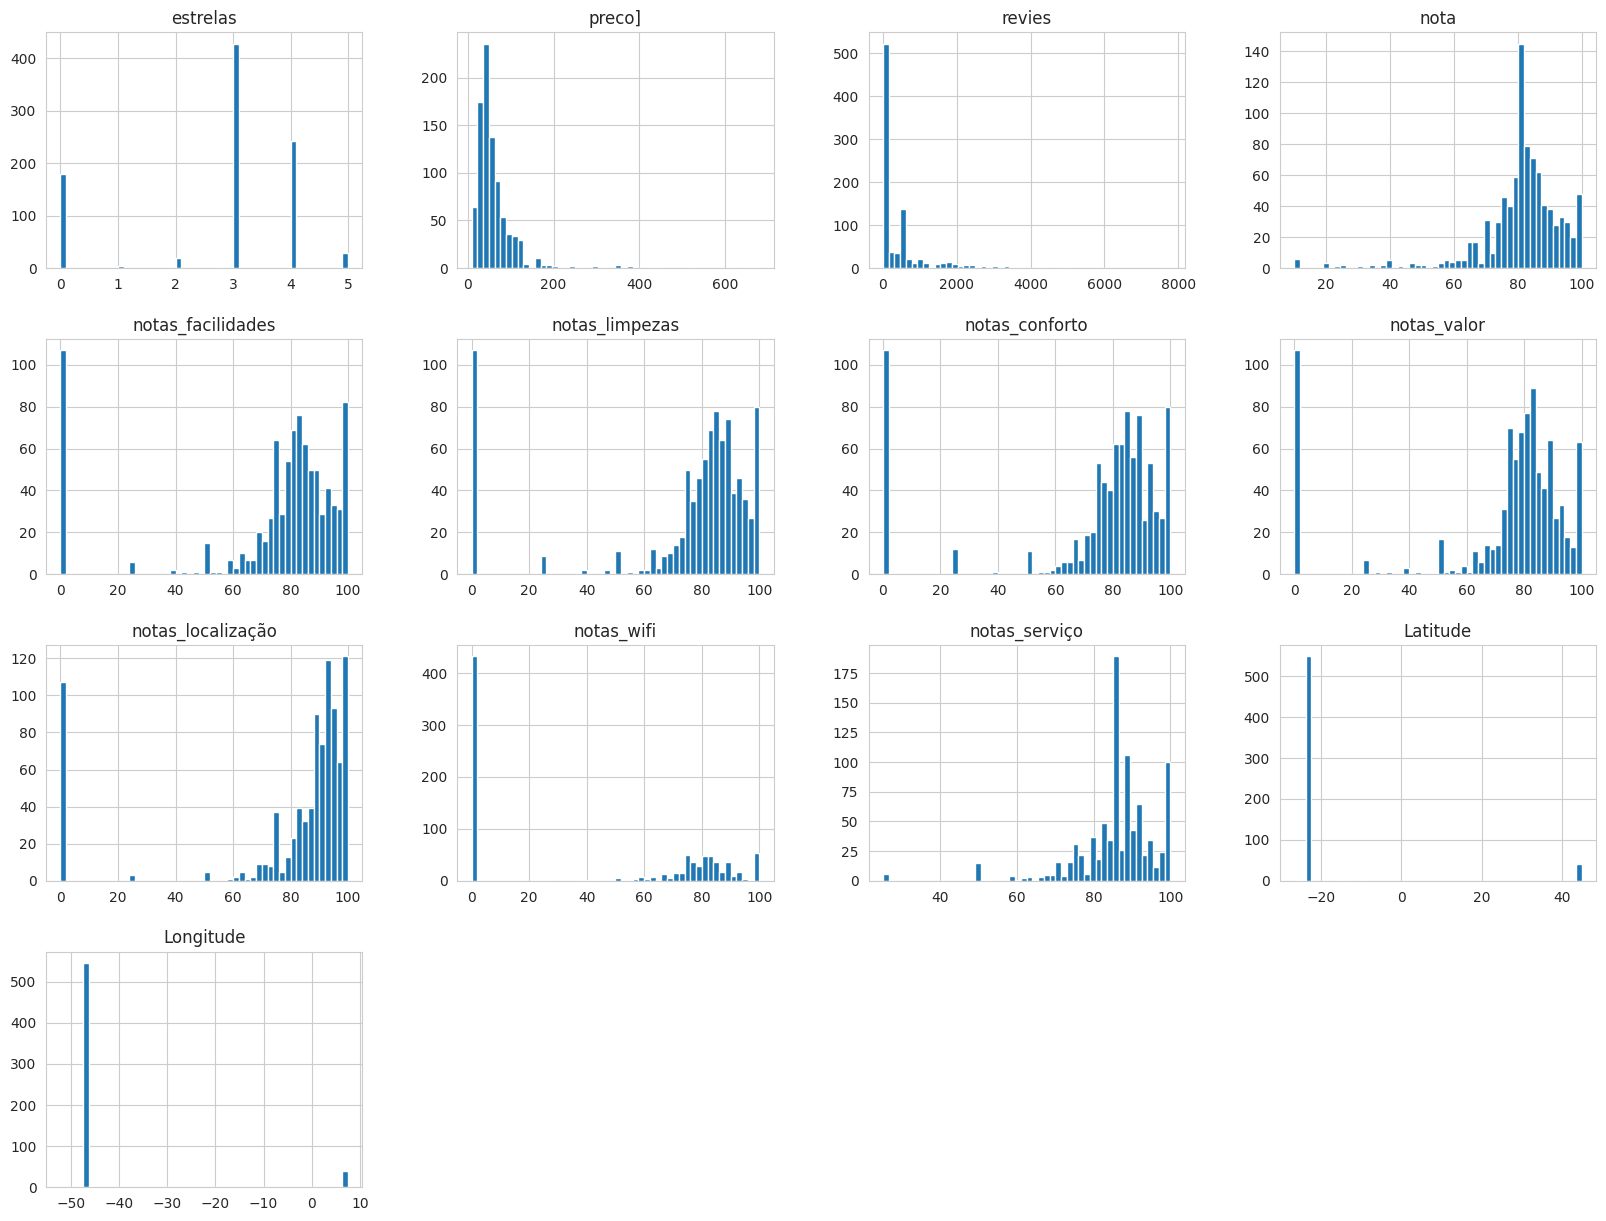

In [104]:
#cria histrograma de variáveis 
booking.hist(bins=50, figsize=(20,15))
plt.show()

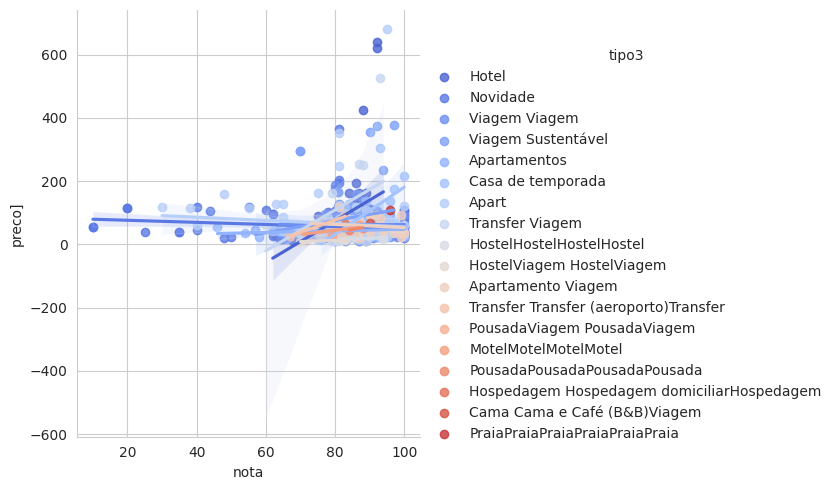

In [140]:
#distplot

sns.lmplot(x='nota', y='preco]', data=booking, palette='coolwarm', hue='tipo3')


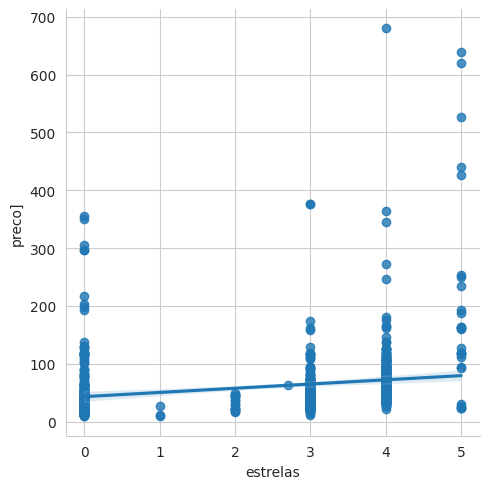

In [106]:
#distplot

sns.lmplot(x='estrelas', y='preco]', data=booking, palette='coolwarm')


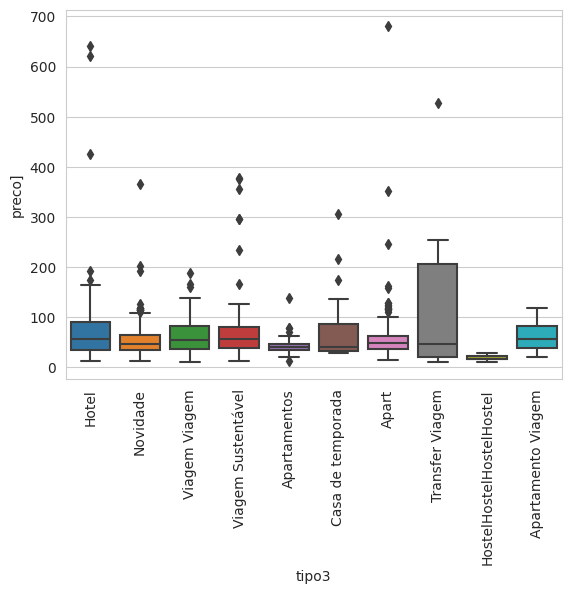

<Figure size 1000x600 with 0 Axes>

In [108]:
#preço x 10 top tipo de acomodação
sns.boxplot(x='tipo3', y='preco]', data=booking_top_10)
plt.xticks(rotation=90)  # Ajuste o ângulo de rotação conforme necessário
plt.figure(figsize=(10, 6))  # Ajuste o tamanho da figura conforme necessário

plt.show()

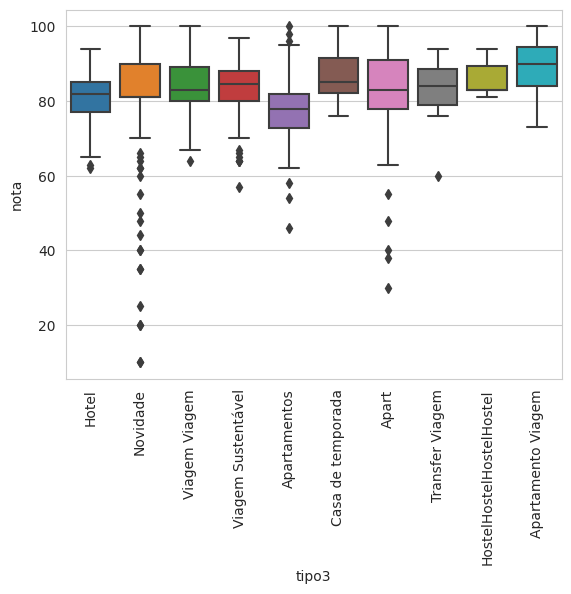

<Figure size 1000x600 with 0 Axes>

In [109]:
#preço x 10 top tipo de acomodação
sns.boxplot(x='tipo3', y='nota', data=booking_top_10)
plt.xticks(rotation=90)  # Ajuste o ângulo de rotação conforme necessário
plt.figure(figsize=(10, 6))  # Ajuste o tamanho da figura conforme necessário

plt.show()

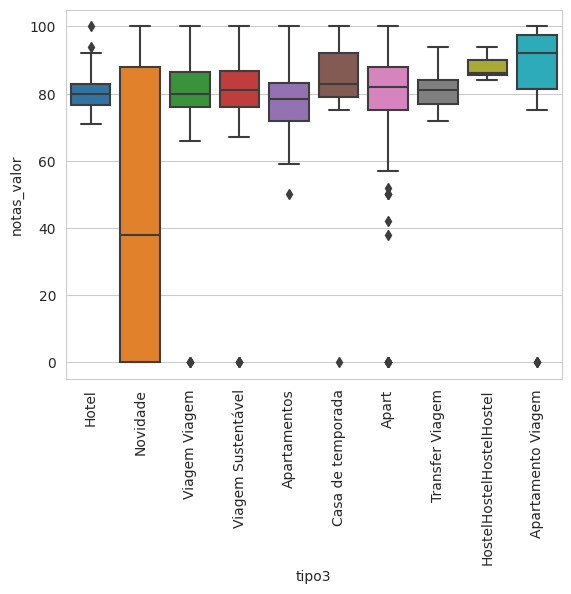

<Figure size 1000x600 with 0 Axes>

In [110]:
#preço x 10 top tipo de acomodação
sns.boxplot(x='tipo3', y='notas_valor', data=booking_top_10)
plt.xticks(rotation=90)  # Ajuste o ângulo de rotação conforme necessário
plt.figure(figsize=(10, 6))  # Ajuste o tamanho da figura conforme necessário

plt.show()

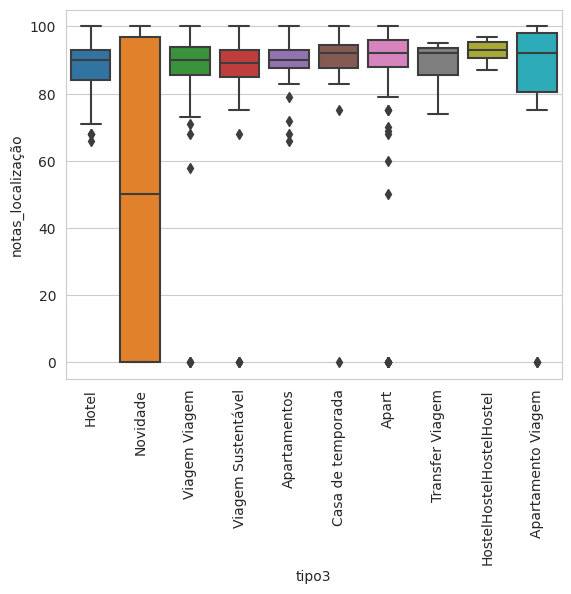

<Figure size 1000x600 with 0 Axes>

In [111]:
#preço x 10 top tipo de acomodação
sns.boxplot(x='tipo3', y='notas_localização', data=booking_top_10)
plt.xticks(rotation=90)  # Ajuste o ângulo de rotação conforme necessário
plt.figure(figsize=(10, 6))  # Ajuste o tamanho da figura conforme necessário

plt.show()

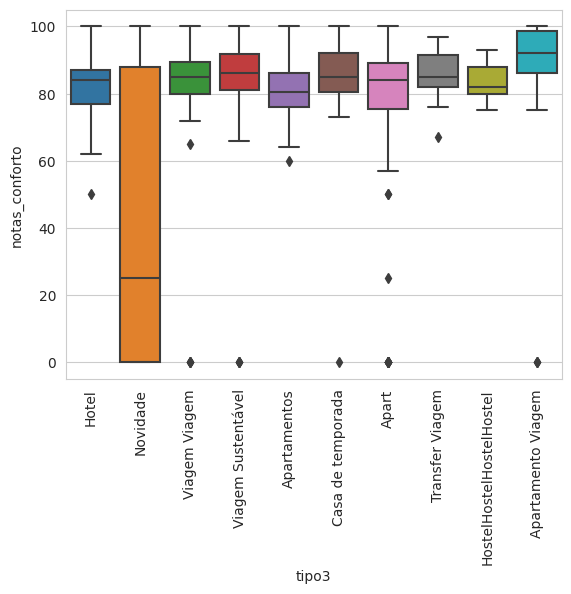

<Figure size 1000x600 with 0 Axes>

In [112]:
#preço x 10 top tipo de acomodação
sns.boxplot(x='tipo3', y='notas_conforto', data=booking_top_10)
plt.xticks(rotation=90)  # Ajuste o ângulo de rotação conforme necessário
plt.figure(figsize=(10, 6))  # Ajuste o tamanho da figura conforme necessário

plt.show()

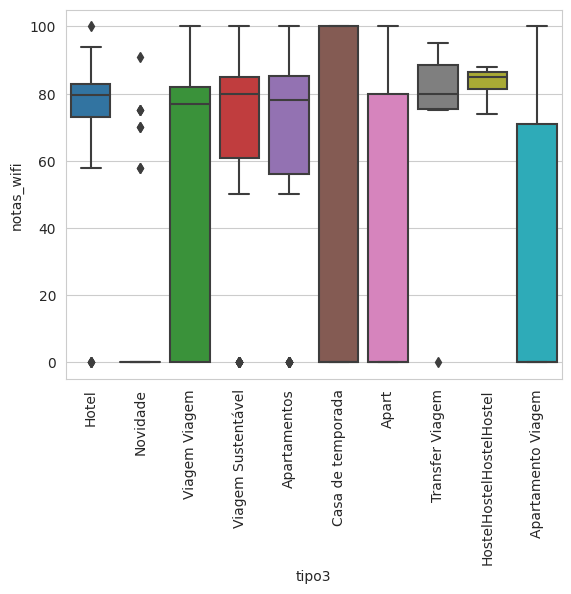

<Figure size 1000x600 with 0 Axes>

In [113]:
#preço x 10 top tipo de acomodação
sns.boxplot(x='tipo3', y='notas_wifi', data=booking_top_10)
plt.xticks(rotation=90)  # Ajuste o ângulo de rotação conforme necessário
plt.figure(figsize=(10, 6))  # Ajuste o tamanho da figura conforme necessário

plt.show()

In [114]:
#check correlation
cov = booking.cov() *250
cov

<ipython-input-114-b49b6c421f8f>:2: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cov = booking.cov() *250


,estrelas,preco],revies,nota,notas_facilidades,notas_limpezas,notas_conforto,notas_valor,notas_localização,notas_wifi,notas_serviço,Latitude,Longitude
estrelas,533.373765,3878.261832,4.050749e+04,661.369973,1844.023148,1791.456173,1816.111728,1238.011420,1681.704938,2.186040e+03,143.028583,270.454400,222.773778
preco],3878.261832,934835.775753,4.198044e+05,9817.511249,-2734.298279,-7121.104784,4598.797140,-24070.222096,-3112.008985,-1.002849e+04,16444.939243,13247.985839,10767.092543
revies,40507.489141,419804.363817,2.230605e+08,19060.725445,-205672.741698,-35744.923988,-64035.561160,-97391.953202,-36975.448017,3.170911e+06,70468.323525,591617.001944,470723.467418
nota,661.369973,9817.511249,1.906073e+04,42114.202746,32795.071809,31320.132409,32742.087011,31746.490122,15258.045748,9.707709e+03,26780.180048,-4383.774572,-3323.795153
notas_facilidades,1844.023148,-2734.298279,-2.056727e+05,32795.071809,210884.097222,207926.675926,208514.620370,200709.921296,204953.129630,1.029771e+05,21720.107538,4209.243328,3416.078707
notas_limpezas,1791.456173,-7121.104784,-3.574492e+04,31320.132409,207926.675926,214819.013580,208093.258025,201628.995679,206603.386420,1.112837e+05,20992.966583,3571.772140,2879.215451
notas_conforto,1816.111728,4598.797140,-6.403556e+04,32742.087011,208514.620370,208093.258025,214504.346914,200966.140123,206460.897531,1.065844e+05,22103.901850,4999.096170,4039.554237
notas_valor,1238.011420,-24070.222096,-9.739195e+04,31746.490122,200709.921296,201628.995679,200966.140123,203144.870062,201331.520988,1.058691e+05,22086.044557,3096.876376,2510.259163
notas_localização,1681.704938,-3112.008985,-3.697545e+04,15258.045748,204953.129630,206603.386420,206460.897531,201331.520988,228569.535802,1.149123e+05,12386.261735,9252.347936,7360.840052
notas_wifi,2186.039506,-10028.494685,3.170911e+06,9707.708771,102977.092593,111283.735802,106584.369136,105869.134568,114912.275309,4.258454e+05,3125.524030,16563.571450,13050.189509


In [115]:
crr = booking.corr()

<ipython-input-115-f879370cdc40>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  crr = booking.corr()


Text(0.5, 1.0, 'Correlation of variables')

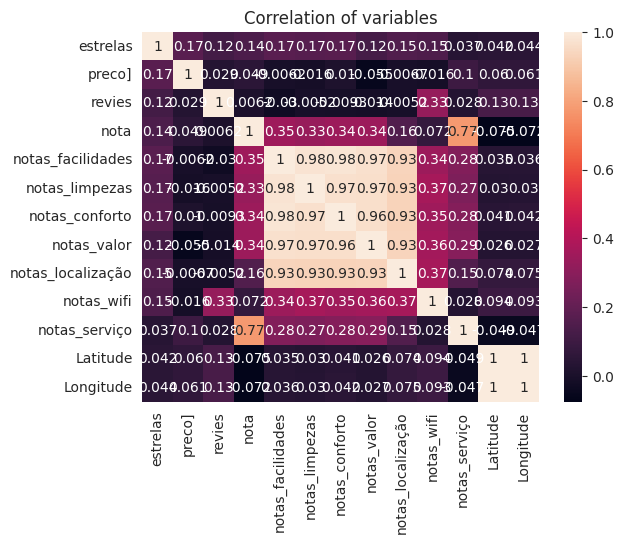

In [116]:
sns.heatmap(crr, annot=True)
plt.title('Correlation of variables')

In [117]:
# Calcular a média de cada coluna
medias = booking.mean()

# Substituir os valores ausentes em cada coluna pela média correspondente
booking = booking.fillna(medias)

#verificacao e treinamento da variavel X
X_filled = X.fillna(X.mean())
scaler = MinMaxScaler()
scaled = pd.DataFrame(scaler.fit_transform(X_filled))

<ipython-input-117-5e5ac553c5d0>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  medias = booking.mean()


In [118]:
booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901 entries, 0 to 900
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   url                900 non-null    object 
 1   nome               876 non-null    object 
 2   descricao          900 non-null    object 
 3   estrelas           901 non-null    float64
 4   preco]             901 non-null    float64
 5   Type               654 non-null    object 
 6   Address            900 non-null    object 
 7   revies             901 non-null    float64
 8   nota               901 non-null    float64
 9   notas_facilidades  901 non-null    float64
 10  notas_limpezas     901 non-null    float64
 11  notas_conforto     901 non-null    float64
 12  notas_valor        901 non-null    float64
 13  notas_localização  901 non-null    float64
 14  notas_wifi         901 non-null    float64
 15  notas_serviço      901 non-null    float64
 16  CEP                861 non

In [119]:
#define X Valeus

												
X = booking[[					
    'estrelas',
    'preco]',
    'revies',
    'nota',
    'notas_facilidades',
    'notas_limpezas', 
    'notas_conforto',
    'notas_conforto', 
    'notas_valor', 
    'notas_localização', 
    'notas_wifi', 
    'notas_serviço', 
    'Latitude',
    'Longitude',
]]

In [120]:
from sklearn.preprocessing import MinMaxScaler

cols = booking.iloc[:, [3,4,7,8,9,10,11,12,13,14,15,20,21]].columns
cols = cols.tolist()  # Converter para lista

# Normalize os dados
scaler = MinMaxScaler()
scaled = pd.DataFrame(scaler.fit_transform(booking.loc[:, cols]), columns=cols)

scaled.head()


,estrelas,preco],revies,nota,notas_facilidades,notas_limpezas,notas_conforto,notas_valor,notas_localização,notas_wifi,notas_serviço,Latitude,Longitude
0,0.8,0.098361,0.066007,0.911111,0.93,0.94,0.93,0.88,0.91,0.94,0.946667,0.043037,0.092357
1,0.8,0.053651,0.009246,0.822222,0.82,0.85,0.83,0.87,0.92,0.80,0.906667,0.043000,0.091954
2,0.8,0.108793,0.475151,0.822222,0.82,0.86,0.85,0.81,0.96,0.72,0.840000,0.043212,0.092181
3,0.6,0.046200,0.000128,0.888889,0.88,1.00,0.88,0.88,1.00,0.00,0.840000,0.043386,0.092164
4,0.8,0.129657,0.199563,0.766667,0.76,0.79,0.80,0.74,0.87,0.78,0.800000,0.043124,0.092176


In [121]:
#function score
def neg_inertia_score(estimator, X_filled):
    return -estimator.inertia_

neg_inertia_scorer = make_scorer(neg_inertia_score)


In [122]:
#create kmeans


kmeans = KMeans(random_state=42)

#Define parameters
param_grid = {
    'n_clusters': range(2, 8),
    'init': ['k-means++', 'random'],
    'max_iter': [300, 500, 1000],
    'n_init': [10, 20, 30],
    'algorithm': ['auto', 'full', 'elkan']
}

# Create Hiperparameters
grid_search = GridSearchCV(
    kmeans,
    param_grid,
    scoring=neg_inertia_scorer,
    n_jobs=-1,
    cv=5,
    verbose=1
)



In [123]:
# execute
grid_search.fit(scaled)

print('Best:', grid_search.best_params_)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan 

Best: {'algorithm': 'auto', 'init': 'k-means++', 'max_iter': 300, 'n_clusters': 2, 'n_init': 10}


In [132]:
#fit model
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 550, n_init = 15, random_state = 1)


In [133]:
rotulos = kmeans.fit_predict(X_filled)

In [134]:
# look cluster
booking['cluster'] = kmeans.labels_ 
grouped = booking.groupby('cluster')
stacked = pd.DataFrame()
for group in grouped:
    means = group[1].mean(axis = 0)
    del means['cluster']
    stacked[group[0]] = means
print(stacked)


                           0            1            2            3  \
estrelas            2.655357     3.121212     3.375000     3.090909   
preco]             59.449723    68.484848    68.250000    52.272727   
revies             39.264286  3093.515152  1715.652778  5833.727273   
nota               81.191071    81.757576    81.861111    80.272727   
notas_facilidades  83.328571    80.878788    81.111111    78.545455   
notas_limpezas     83.785714    83.787879    83.708333    81.636364   
notas_conforto     83.369643    82.969697    83.013889    80.636364   
notas_valor        81.260714    79.757576    80.416667    79.454545   
notas_localização  89.562500    88.212121    89.416667    90.272727   
notas_wifi         35.242857    78.000000    78.666667    77.454545   
notas_serviço      85.685714    87.181818    87.333333    85.545455   
Latitude          -19.998417   -20.922802   -16.683535    -4.459581   
Longitude         -43.863906   -44.566482   -41.219839   -31.540272   

     

<ipython-input-134-2238a46a7db7>:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  means = group[1].mean(axis = 0)
<ipython-input-134-2238a46a7db7>:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  means = group[1].mean(axis = 0)
<ipython-input-134-2238a46a7db7>:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warni

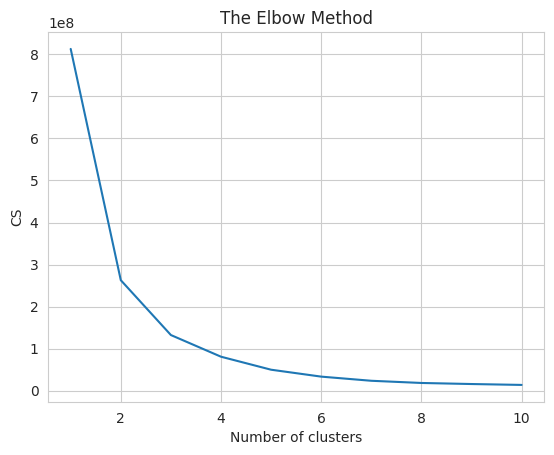

In [135]:
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_filled)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [136]:
#accuracy of model/
silhouette_avg = silhouette_score(X_filled, kmeans.labels_)
print('silhueta media:', silhouette_avg)

silhueta media: 0.6391312121950433


In [137]:
#percentual of clusters
booking['cluster'].value_counts(normalize=True)

0    0.621532
4    0.249723
2    0.079911
1    0.036626
3    0.012209
Name: cluster, dtype: float64

In [138]:
booking.to_csv('/content/drive/My Drive/data_sets/c_booking.csv')


In [139]:
import pandas as pd
import folium


mapa = folium.Map(location=[-23.5505, -46.6333], zoom_start=12)

booking = booking.dropna(subset=['Latitude', 'Longitude'])


# Definir cores para cada cluster
colors = {
    0: 'red',
    1: 'blue',
    2: 'green',
    3: 'orange',
    4: 'purple'
}

# Iterar sobre as linhas do DataFrame e adicionar marcadores no mapa
for index, row in booking.iterrows():
    latitude = row['Latitude']
    longitude = row['Longitude']
    cluster = row['cluster']
    
    # Definir a cor com base no cluster
    if cluster in colors:
        color = colors[cluster]
    else:
        color = 'gray'
    
    # Adicionar marcador com a cor definida
    folium.Marker([latitude, longitude], icon=folium.Icon(color=color)).add_to(mapa)

# Exibir o mapa
mapa
